In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv('../input/udemy-courses/udemy_courses.csv')
data.drop(['course_id','url'], axis=1, inplace=True)

In [2]:
data['price'] = data['price'].str.replace('Free','0')
data['price'] = data['price'].str.replace('TRUE','0')        
data['price'] = data['price'].astype('int')

data['is_paid'] = data['is_paid'].replace('TRUE', 'True')
data['is_paid'] = data['is_paid'].replace('FALSE', 'False')
data['is_paid'] = data['is_paid'].replace('https://www.udemy.com/learnguitartoworship/', 'True')

# Which subject consist of most expensive courses?----> Web Development

In [3]:
subject = data.loc[:,['price', 'subject']]
subject['total_price'] = subject.groupby('subject')['price'].transform('sum')
subject.drop(['price'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('total_price')

fig = px.pie(subject, names='subject', values='total_price', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which subject has most free courses?-----> Web Development

In [4]:
subject = data.loc[data['is_paid']=='False', ['is_paid','subject']]
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')

fig = px.pie(subject, names='subject', values='count', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of price

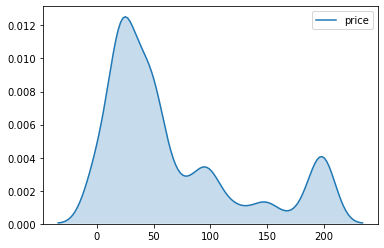

In [5]:
sns.kdeplot(data=data['price'], label='price', shade=True)

# Which subject have most paid courses?-----> Business Finance

In [6]:
subject = data.loc[data['is_paid']=='True', ['is_paid','subject']]
subject['count'] = subject.groupby('subject')['is_paid'].transform('count')
subject.drop(['is_paid'],axis=1, inplace=True)
subject = subject.drop_duplicates().reset_index(drop=True)
subject = subject.sort_values('count')

fig = px.pie(subject, names='subject', values='count', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Distribution of number of subscribers

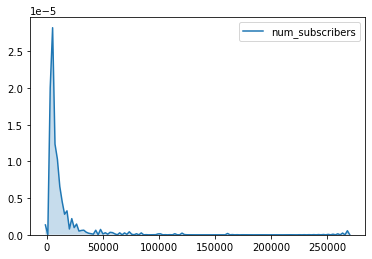

In [7]:
sns.kdeplot(data=data['num_subscribers'], label='num_subscribers', shade=True)

# Which course have most subscribers?-----> Learn HTML5 Programming from Scratch

In [8]:
course = data.loc[:, ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].max().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.head(10)

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which course have least subscribers? ----> Something out of my dictionary

In [9]:
course = data.loc[(data['num_subscribers']>100), ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].min().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.tail(10)

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which course have highest number of reviews?----> The Web Developer Bootcamp

In [10]:
course = data.loc[:, ['course_title','num_reviews']]
course = course.groupby('course_title')['num_reviews'].max().reset_index()
course = course.sort_values('num_reviews', ascending=False)
course = course.head(7)

fig = go.Figure(data=[go.Pie(labels=course['course_title'], values=course['num_reviews'])])
fig.update_traces(rotation=90, pull=[0.2,0.05,0.05,0.05,0.05,0.05,0.05], textinfo="percent+label")
fig.show()

# Which course have least number of reviews? ----> many courses have same number of reviews

In [11]:
course = data.loc[data['num_reviews']>10, ['course_title','num_reviews']]
course = course.groupby('course_title')['num_reviews'].min().reset_index()
course = course.sort_values('num_reviews', ascending=False)
course = course.tail(10)

fig = px.pie(course, names='course_title', values='num_reviews', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Which level courses have most subscribers?----> All levels(not specified)

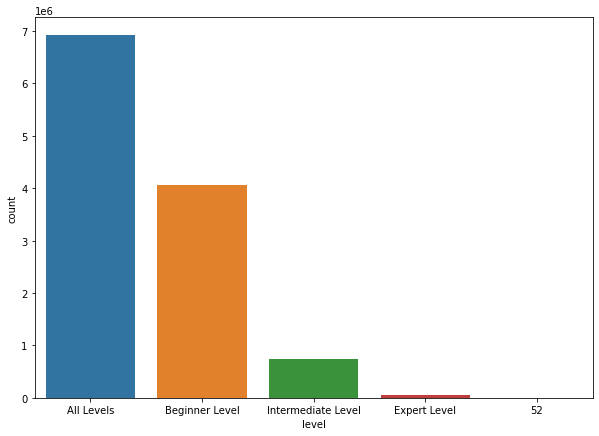

In [12]:
course = data.loc[:, ['level','num_subscribers']]
course['count'] = course.groupby('level')['num_subscribers'].transform('sum')
course = course.sort_values('count', ascending=False)
course.drop('num_subscribers', axis=1, inplace=True)
course = course.drop_duplicates().reset_index(drop=True)
course = course.head()

fig = plt.figure(figsize=(10,7))
sns.barplot(data=course, x='level', y='count')

# Which course have highest number of lectures? ----> 

## Back to school Web Development and Programming Bundle

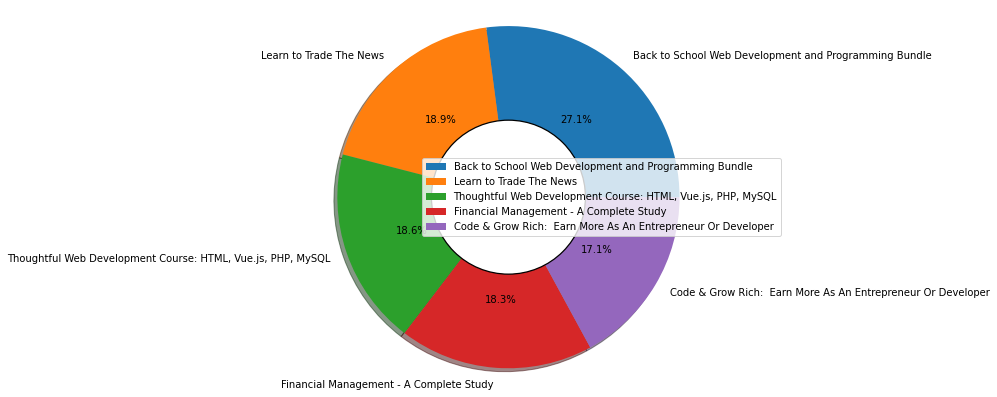

In [13]:
course = data.loc[:, ['course_title','num_lectures']]
course = course.groupby('course_title')['num_lectures'].max().reset_index()
course = course.sort_values('num_lectures', ascending=False)
course = course.head()

fig = plt.figure(figsize=(10,7))
plt.pie(course['num_lectures'], labels=course['course_title'], autopct='%1.1f%%', shadow=True)
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(loc='center right')
plt.axis('equal')
plt.show()

# Which paid course has most subscribers?---> The Web Developer Bootcamp

In [14]:
course = data.loc[data['is_paid']=='True', ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].max().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.head(10)

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

Now lets analyze the top 5 courses from the above pie chart.

In [15]:
top_5 = course['course_title'].head().tolist()

# Which of the top courses has most reviews? ---> The Web Developer Bootcamp

In [16]:
course = data.loc[data['course_title'].isin(top_5), ['course_title','num_reviews']]
course = course.groupby('course_title')['num_reviews'].max().reset_index()
course = course.sort_values('num_reviews', ascending=False)
course = course.head()

fig = go.Figure(data=[go.Pie(labels=course['course_title'], values=course['num_reviews'])])
fig.update_traces(rotation=90, pull=[0.2,0.05,0.05,0.05,0.05], textinfo="percent+label")
fig.show()

# Which of the top 5 courses have most lectures? --->
# Pianoforall - Incredible New Way To Learn Piano & Keyboard

In [17]:
course = data.loc[data['course_title'].isin(top_5), ['course_title','num_lectures']]
course = course.groupby('course_title')['num_lectures'].max().reset_index()
course = course.sort_values('num_lectures', ascending=False)
course = course.head()

fig = go.Figure(data=[go.Pie(labels=course['course_title'], values=course['num_lectures'])])
fig.update_traces(rotation=90, pull=[0.2,0.05,0.05,0.05,0.05], textinfo="percent+label")
fig.show()

# Which top course has highest content duration? ---> The Web Developer Bootcamp(40+ hours)

In [18]:
def content(strng):
    lst = strng.split()
    return float(lst[0])
top_5_courses = data[data['course_title'].isin(top_5)]
top_5_courses['content_duration'] = top_5_courses['content_duration'].apply(content)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



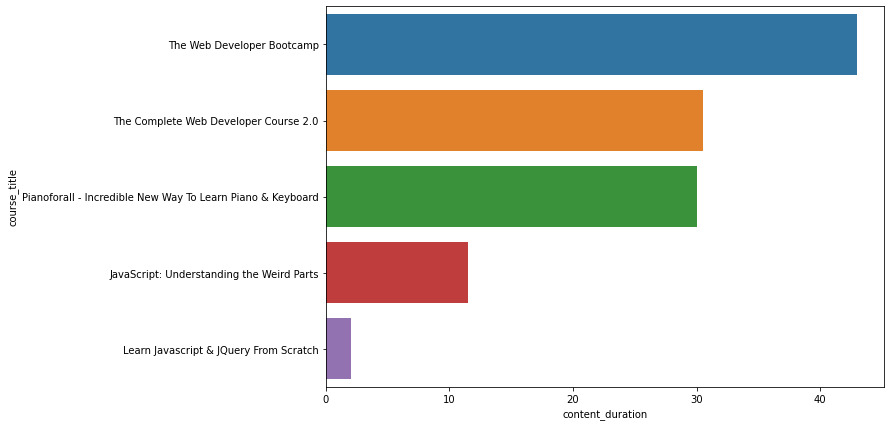

In [19]:
course = top_5_courses.loc[:, ['course_title','content_duration']]
course = course.groupby('course_title')['content_duration'].max().reset_index()
course = course.sort_values('content_duration', ascending=False)
course = course.head()

plt.figure(figsize=(10,7))
sns.barplot(data=course, x='content_duration', y='course_title')
plt.show()

# Which free course has most subscribers?---> Learn HTML5 Programming From Scratch

In [20]:
course = data.loc[data['is_paid']=='False', ['course_title','num_subscribers']]
course = course.groupby('course_title')['num_subscribers'].max().reset_index()
course = course.sort_values('num_subscribers', ascending=False)
course = course.head()

fig = px.pie(course, names='course_title', values='num_subscribers', template='seaborn')
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

In [21]:
top_5 = course['course_title'].head().tolist()

def content_free(strng):
    lst = strng.split()
    return float(lst[0])

top_5_courses = data[data['course_title'].isin(top_5)]
top_5_courses['content_duration'] = top_5_courses['content_duration'].apply(content_free)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Which free course has most reviews?--->Learn HTML5 Programming From Scratch

In [22]:
course = top_5_courses.loc[:, ['course_title','num_reviews']]
course = course.groupby('course_title')['num_reviews'].max().reset_index()
course = course.sort_values('num_reviews', ascending=False)
course = course.head()

fig = go.Figure(data=[go.Pie(labels=course['course_title'], values=course['num_reviews'])])
fig.update_traces(rotation=90, pull=[0.2,0.05,0.05,0.05,0.05], textinfo="percent+label")
fig.show()

# Which free course has most lectures?----> Free Beginner Electric Guitar Lessons(90+)

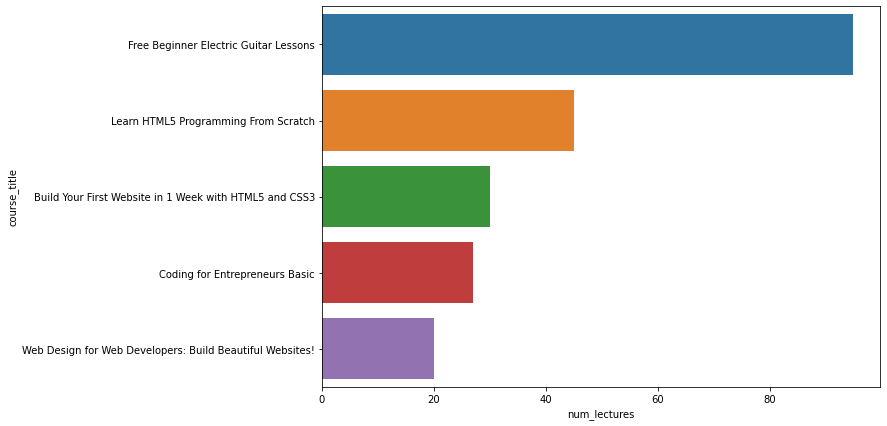

In [23]:
course = top_5_courses.loc[:, ['course_title','num_lectures']]
course = course.groupby('course_title')['num_lectures'].max().reset_index()
course = course.sort_values('num_lectures', ascending=False)
course = course.head()

plt.figure(figsize=(10,7))
sns.barplot(data=course, x='num_lectures', y='course_title')
plt.show()

# Best free course in the data: Learn HTML5 Programming From Scratch
## Number of Subscriber: 268923
## Number of reviews: 8629
## Number of lectures: 45
## Content Duration: 10.5 hours

# Best paid course in the data: The Web Developer Bootcamp
## Number of Subscriber: 121584
## Number of reviews: 27445
## Number of lectures: 342
## Content Duration: 43 hours